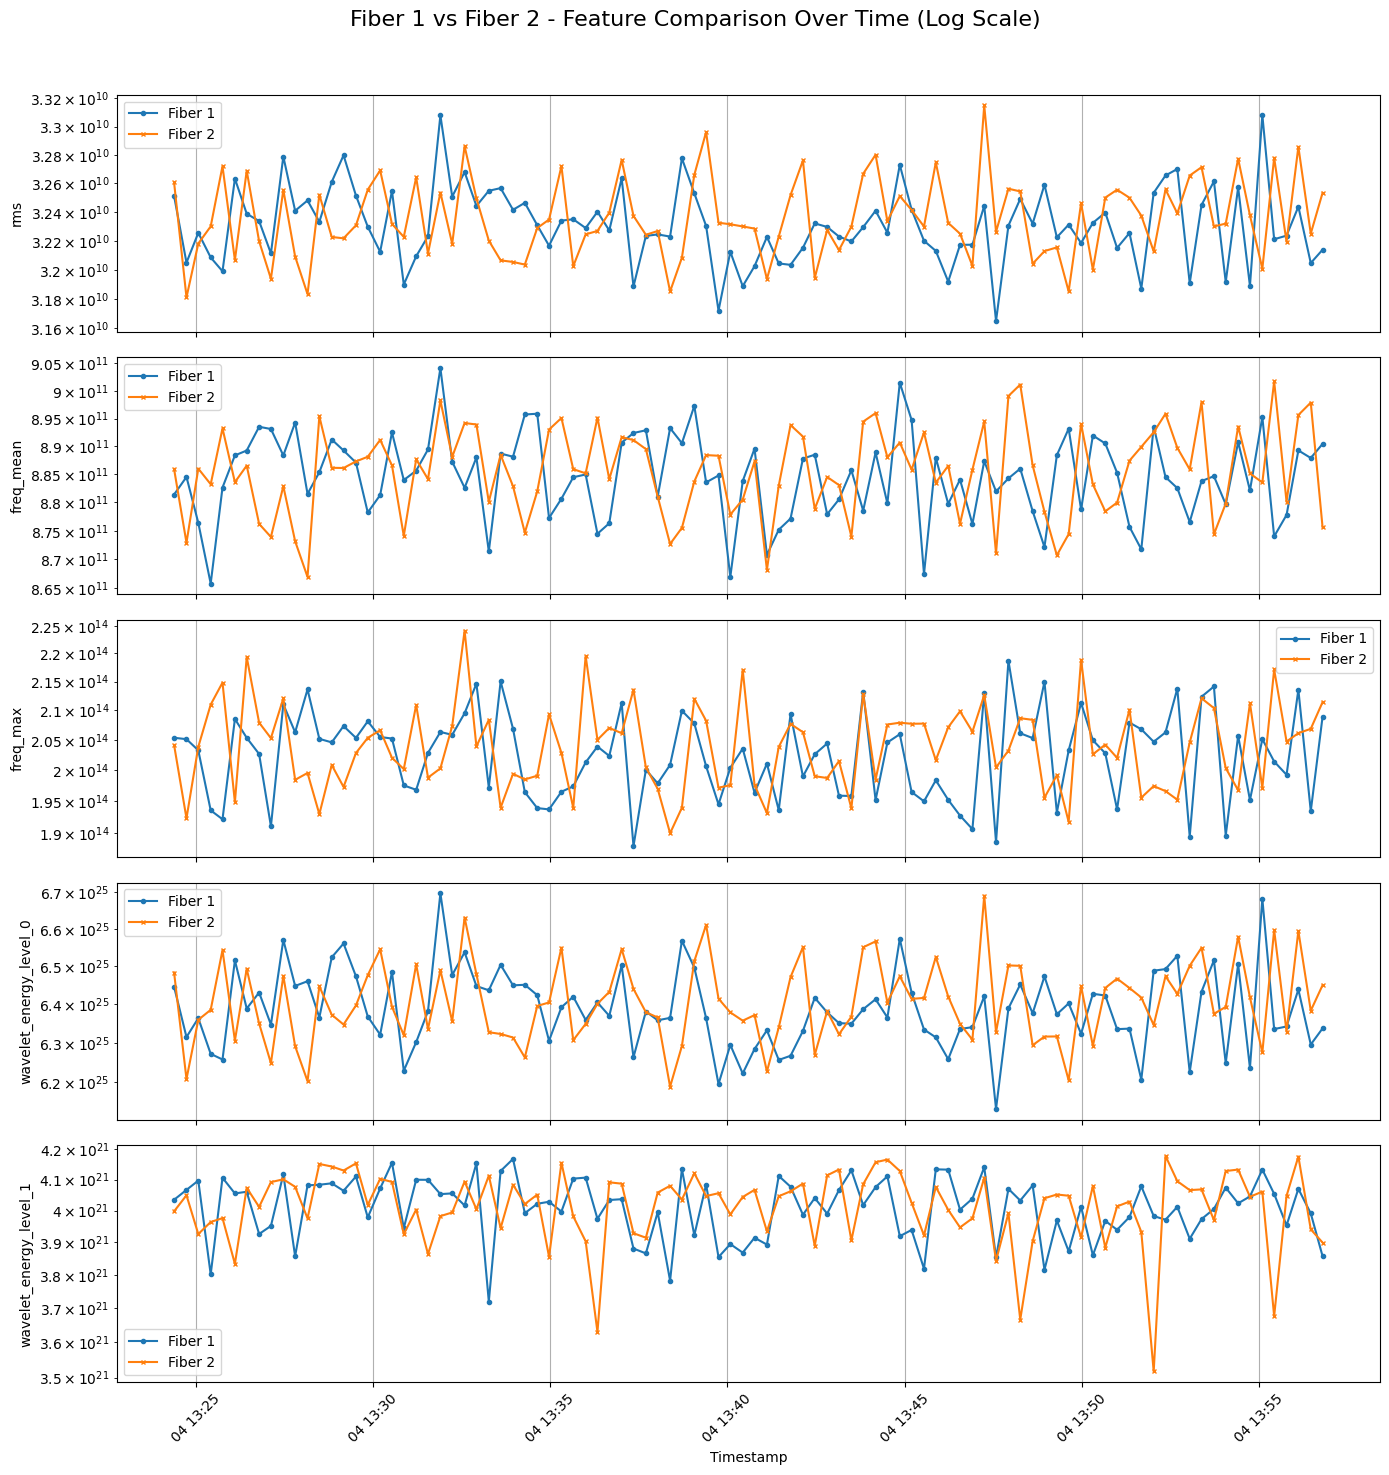

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# 重新读取并处理
df = pd.read_csv("sorted_by_fiber_and_time.csv")
df['timestamp'] = pd.to_datetime(df['file'].str.extract(r'(\d{14})')[0], format='%Y%m%d%H%M%S')
df['fiber'] = df['file'].str.extract(r'(fibers_\d+)_')

# 筛选 fiber_1 和 fiber_2
df_fiber1 = df[df['fiber'] == 'fibers_1']
df_fiber2 = df[df['fiber'] == 'fibers_2']

# 特征
features_to_plot = ['rms', 'freq_mean', 'freq_max', 
                    'wavelet_energy_level_0', 'wavelet_energy_level_1']

# 创建子图
fig, axes = plt.subplots(len(features_to_plot), 1, figsize=(14, 3 * len(features_to_plot)), sharex=True)

# 确保 axes 是一维的（有时只有1个特征时会变成单个Axes对象）
if len(features_to_plot) == 1:
    axes = [axes]

# 画图（对数坐标轴 + 各 subplot 独立绘制）
for i, feature in enumerate(features_to_plot):
    axes[i].plot(df_fiber1['timestamp'], df_fiber1[feature], label='Fiber 1', marker='o', markersize=3)
    axes[i].plot(df_fiber2['timestamp'], df_fiber2[feature], label='Fiber 2', marker='x', markersize=3)
    axes[i].set_ylabel(feature)
    axes[i].set_yscale('log')
    axes[i].legend()
    axes[i].grid(True)

# 总体设置
plt.xlabel("Timestamp")
plt.suptitle("Fiber 1 vs Fiber 2 - Feature Comparison Over Time (Log Scale)", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
